In [221]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn import cluster as cl
from sklearn  import preprocessing  as pr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import ensemble as ens



In [350]:
# Загрузка данных, удаление лишних данных по всем 3 выборкам
column=['0takt','1takt','2takt','3takt','4takt','5takt','6takt','7takt','8takt',
                          '9takt','10takt','11takt','12takt','13takt','14takt','15takt','16takt','17takt']

nn=[3,16,22,24,28]
npp=16
try:
    df1=pd.read_csv('Results/К'+str(npp)+'.dat',delimiter=' ',encoding='windows-1250',header=1,usecols=range(1,17))
    df1.columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']


    print('Данные загруженны ')
except:
    print('Данные не загрузились ')

try:  
    #df1=df1.drop([0,0]) # удаление технической строки
    #df1=df1.drop(columns=[17,0]) # удаление лишних столбцов,   расстояние мм будет индекс

    #df1=df1.astype("float32")# приводим данные к float

    print('Данные  обработаны ')
except:
    print('Данные не обработались ')

    
#Здесь указываем требуемый датафрейм
df11=df1.copy()

#Приведение к общей координате
for n in df11.columns:
    df11[n]=np.roll(df11[n],-50)
    
for p in ['3','4','5','6','9','10']:
    df11[n]=np.roll(df11[n],95)
    
for n in df11.columns:
    df11[n]=np.roll(df11[n],-95)
    
    
    
#Загрузка файла с целевой переменной
#Здесь указываем требуемый таргет
targ=pd.read_table('Target/k'+str(npp)+'.csv',sep=',')
targ
targ.fillna(0)

#Сделаем в датафрейме общем разбитие на классы в соответствии с имеющимся таргетом
df11['deffect']=0
df11['visota']=0
for n in range(len(targ)):
    if targ['Сторона'][n]=='A':
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=1
        df11.visota[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=targ['Высота дефекта'][n]
    if targ['Сторона'][n]=='B':
        df11.visota[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=targ['Высота дефекта'][n]
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n]-1+int(targ['Длина дефекта'][n]))]=2  
    if targ['Тип дефекта'][n]=='T':
        df11.visota[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n])]=targ['Высота дефекта'][n]
        df11.deffect[targ['Начало дефекта'][n]-1:(targ['Начало дефекта'][n])]=3    

Данные загруженны 
Данные  обработаны 


In [351]:
df11

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,deffect,visota
0,0,0,13,10,255,255,0,0,69,70,19,48,205,183,35,0,0,0
1,0,0,10,0,255,255,16,0,68,42,10,31,247,205,80,0,0,0
2,0,0,2,0,255,255,31,0,51,22,11,24,241,221,103,0,0,0
3,0,0,0,0,255,255,45,0,24,22,4,21,225,228,124,0,0,0
4,0,2,0,0,218,255,43,6,21,39,0,51,221,229,122,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,17,13,0,0,242,255,18,0,21,23,55,68,65,118,78,0,0,0
1032,16,0,0,0,226,255,19,0,11,29,53,37,48,105,81,0,0,0
1033,8,0,0,0,238,255,18,0,21,27,41,10,68,109,83,0,0,0
1034,4,0,0,12,255,255,20,0,44,70,35,14,83,133,83,0,0,0


In [352]:
from sklearn.cluster import KMeans

SC=pr.StandardScaler()
df11X=df11.drop(['deffect'],axis=1)
y=df11.deffect
X=df11X#SC.fit_transform(df11X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [353]:


#Зделаем препроцессинг данных (подготовку)
SC=pr.StandardScaler()
df11X=df11.drop(['deffect'],axis=1)
y=df11.deffect
X=SC.fit_transform(df11X)

# Используем несколько алгоритмов кластеризации
KM=cl.KMeans(n_clusters=8,  init='k-means++', n_init=10, max_iter=300, 
          tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
DB=cl.DBSCAN(eps=50,  min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', 
       leaf_size=30, p=None, n_jobs=None)
AP=cl.AffinityPropagation( damping=0.5, max_iter=200, convergence_iter=15, copy=True,
                    preference=None, affinity='euclidean', verbose=False, random_state=None)

AC=cl.AgglomerativeClustering(n_clusters=8,  affinity='euclidean', memory=None, connectivity=None, 
                        compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

OP=cl.OPTICS( min_samples=5, max_eps=50, metric='minkowski', p=2, metric_params=None, cluster_method='xi', 
       eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', 
       leaf_size=30, memory=None, n_jobs=None)

SpC=cl.SpectralClustering(n_clusters=8, random_state=1,
                                     affinity='nearest_neighbors')

df111=df11.copy()
df111['KmeansSC']=KM.fit_predict(X)
#df111['DBSCANSC']=DB.fit_predict(X)
#df111['APSC']=DB.fit_predict(X)
df111['ACSC']=AC.fit_predict(X)
df111['OPSC']=OP.fit_predict(X)
df111['SpCSC']=SpC.fit_predict(X)

df111['Kmeans']=KM.fit_predict(df11)
df111['DBSCAN']=DB.fit_predict(df11)
df111['AP']=AP.fit_predict(df11)
df111['AC']=AC.fit_predict(df11)
df111['OP']=OP.fit_predict(df11)
df111['SpC']=SpC.fit_predict(df11)


In [354]:
df111.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'deffect', 'visota', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC'],
      dtype='object')

In [356]:
# Оценка кластеризации по таргету с помощью метрик, подбор параметров
SC=pr.StandardScaler()
df11X=df11.drop(['deffect'],axis=1)


y=df11.deffect
y=y.fillna(0)
X=SC.fit_transform(df11X)

algorithms = []
algorithms.append(cl.KMeans(n_clusters=4, random_state=1))
algorithms.append(cl.AffinityPropagation())
algorithms.append(cl.SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(cl.AgglomerativeClustering(n_clusters=4))




data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.195118,0.200835,0.343643,0.146201,0.205130,0.162192
Affinity,0.010908,0.150137,0.914134,0.099252,0.179063,0.155201
Spectral,0.620388,0.595890,0.787333,0.482656,0.598448,0.132668
Agglomerative,0.239746,0.267304,0.407404,0.203671,0.271575,0.197290


<IPython.core.display.Javascript object>


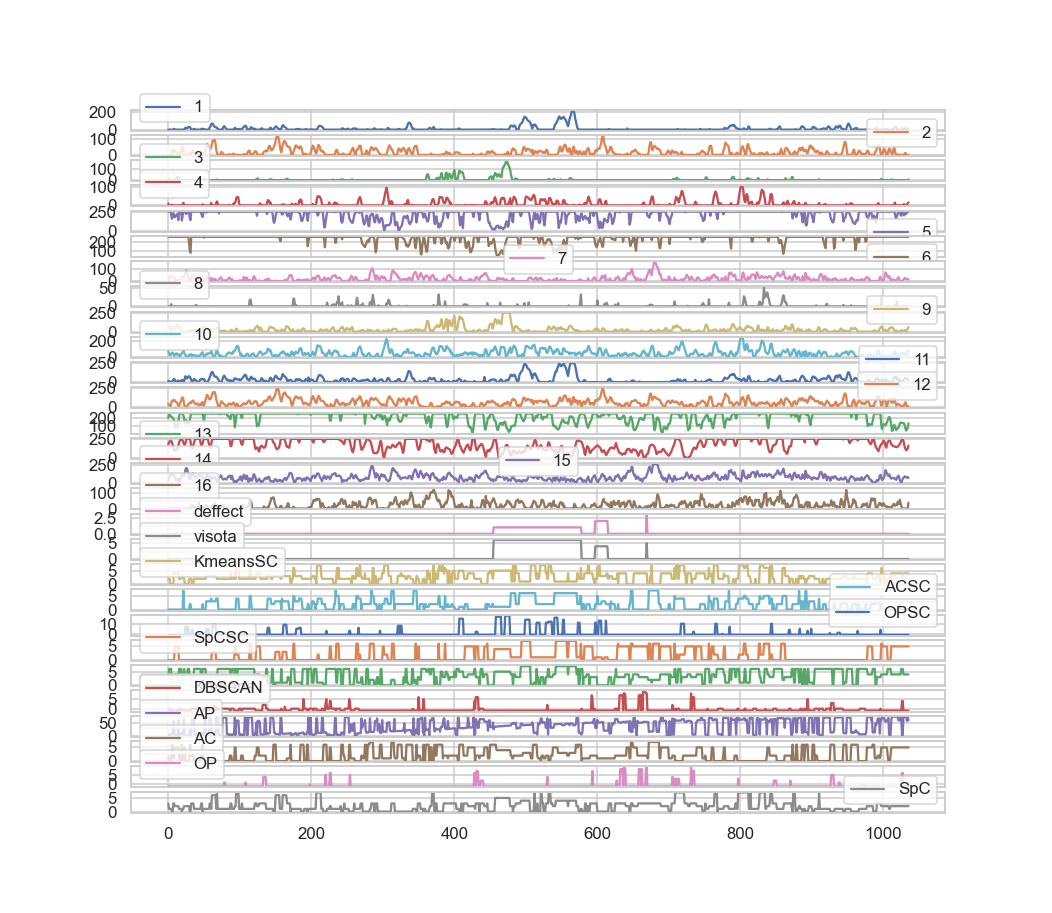

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [359]:
df111.plot.line(subplots=True)

# Добавим классификатор на имеющийся DF

In [325]:
df111.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'deffect', 'visota', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC'],
      dtype='object')

In [357]:
X=df111[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC']]
y=df111.deffect

MiMa=pr.Normalizer()#pr.MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

X=MiMa.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50) 

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((311, 26), (311,))

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))


Основные метрики качества на test:
Accuracy: 0.97
Precision: 0.55
Recall: 0.72
F1: 0.57

Матрица ошибок:
[[253   1   1   1]
 [  0  47   6   0]
 [  0   0   2   0]
 [  0   0   0   0]]


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SyntaxError: invalid syntax (Temp/ipykernel_11332/3147742560.py, line 1)

<IPython.core.display.Javascript object>


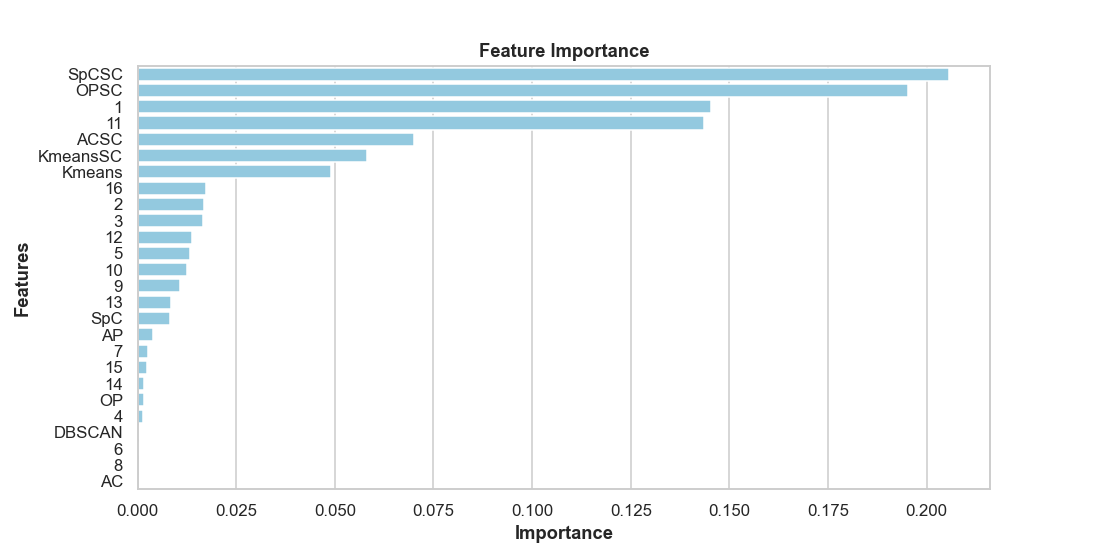

None

,Features,Gini-Importance
0,SpCSC,0.205744
1,OPSC,0.195212
2,1,0.145317
3,11,0.143682
4,ACSC,0.070168
5,KmeansSC,0.058166
6,Kmeans,0.048998
7,16,0.017467
8,2,0.016864
9,3,0.016556


In [360]:
#Отображение важности признаков
feats = {}
for feature, importance in zip(df111[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', 'KmeansSC', 'ACSC', 'OPSC',
       'SpCSC', 'Kmeans', 'DBSCAN', 'AP', 'AC', 'OP', 'SpC']], clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.0)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=12, weight = 'bold')
plt.ylabel('Features', fontsize=12, weight = 'bold')
plt.title('Feature Importance', fontsize=12, weight = 'bold')
display(plt.show())
display(importances)

In [330]:
y_pred = clf.predict(X)

In [331]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [332]:
cc=pd.DataFrame(y_pred )

In [333]:
cc.value_counts()

0    856
2    119
1     52
dtype: int64

In [334]:
cc.to_csv('rezult.csv')

In [335]:
metrics.adjusted_rand_score(df11.deffect, y_pred)

0.9781355887704694

<IPython.core.display.Javascript object>


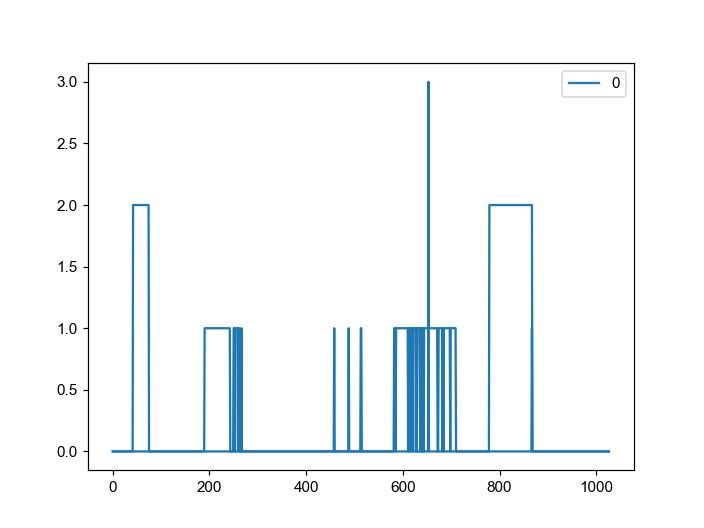

array([<AxesSubplot:>], dtype=object)

In [287]:
cc.plot.line(subplots=True)

In [336]:
df11.deffect.plot.line()

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Importance', ylabel='Features'>

In [361]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.95
Precision: 0.54
Recall: 0.74
F1: 0.60

Матрица ошибок:
[[253   8   6   1]
 [  0  40   0   0]
 [  0   0   3   0]
 [  0   0   0   0]]


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [362]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

#  Метрики качества модели
print('Основные метрики качества на test:')
print("Accuracy: %.2f" % metrics.accuracy_score(y_pred, y_test))
print("Precision: %.2f" % metrics.precision_score(y_pred, y_test, average='macro'))
print("Recall: %.2f" % metrics.recall_score(y_pred, y_test, average='macro'))
print("F1: %.2f" % metrics.f1_score(y_pred, y_test, average='macro'))
print()

print('Матрица ошибок:')
print(metrics.confusion_matrix(y_pred, y_test))

Основные метрики качества на test:
Accuracy: 0.95
Precision: 0.54
Recall: 0.74
F1: 0.60

Матрица ошибок:
[[253   8   6   1]
 [  0  40   0   0]
 [  0   0   3   0]
 [  0   0   0   0]]


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [375]:
from sklearn import linear_model as lm

In [376]:
LR=lm.LinearRegression()

In [386]:
xx=df11[[ '5', '6', '13',
       '14']]


SC=pr.StandardScaler()




xx=SC.fit_transform(xx)

LR.fit(xx, y)

LinearRegression()

In [387]:
LR.score(xx, y)

0.19361083743746865

In [371]:
LR.predict(X)

array([-0.03462859, -0.04029838, -0.09765965, ..., -0.1346476 ,
       -0.07357368, -0.09036604])

In [372]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1031    0
1032    0
1033    0
1034    0
1035    0
Name: deffect, Length: 1036, dtype: int64